In [2]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_csv('twitter_df.csv')

df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['edit_history_tweet_ids'])
df.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN


In [4]:
df2 = df.groupby('tweet_created_at')
df2.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,824046526208974848,1327363781400248320,2020-11-13T21:32:41.000Z,1327363781400248320,NaN,en,everyone,Twitter for iPhone,RT @BorisEP: Dominion Voting Systems used in M...,NaN,...,"Proud American, Wifey, Auntie, Veteran",Doreen Denton,Dentonreen,"Nevada, USA",373,469,2,105212,NaN,NaN
3488,2974110382,1324918072021544961,2020-11-07T03:34:18.000Z,1324918072021544961,NaN,en,everyone,Twitter for iPhone,Dominion Voting Systems: The company at the ce...,NaN,...,NaN,TJG,Yellowknife7777,NaN,279,1097,6,92850,NaN,NaN
3489,742928442740482049,1326791555198357506,2020-11-12T07:38:52.000Z,1326791555198357506,NaN,en,everyone,Twitter for Android,RT @hrtablaze: The largest county in Arizona i...,NaN,...,My goal is to live life so that it reflects th...,Kevin D. Sunthimer,thebocious,"Lompoc, CA",108,352,0,2293,NaN,NaN
3490,313676704,1327355781998645253,2020-11-13T21:00:54.000Z,1327355781998645253,NaN,en,everyone,Twitter for iPhone,RT @BorisEP: Dominion Voting Systems used in M...,NaN,...,AMERICAN,Jennifer Dickson,J_Dickson12,"Wisconsin, USA",613,1626,1,363960,NaN,NaN


In [22]:
#Creates the graph with nodes as the author id and retweets as the retweets
G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted', ['like_count', 'quote_count',
       'reply_count', 'retweet_count','followers_count',
       'following_count', 'listed_count', 'tweet_count']) 

G= G.to_directed()
sorted(G.degree, key=lambda x: x[1], reverse=True)

[(1229060372105134080, 178),
 (1.3249114425590743e+18, 154),
 (1.32486661401421e+18, 124),
 (1.3248664845360128e+18, 116),
 (1.3248658133256806e+18, 116),
 (1.3248663021005087e+18, 114),
 (1.3248661063271834e+18, 114),
 (1.3248660110494351e+18, 110),
 (1.3248651233039196e+18, 110),
 (1.3248650496939827e+18, 110),
 (1.3248653336651407e+18, 108),
 (1.3248595154440806e+18, 106),
 (1.324860835483693e+18, 106),
 (1.3248606321733222e+18, 104),
 (1.324860749563351e+18, 104),
 (1.3247444448103014e+18, 104),
 (1.3248592038617539e+18, 100),
 (1.3247526599963976e+18, 98),
 (1.3248294610035548e+18, 98),
 (1.3248524024160952e+18, 96),
 (1.3248533922593382e+18, 96),
 (1.3248534624091054e+18, 96),
 (1.3248536650147676e+18, 96),
 (1.3248445393712906e+18, 96),
 (1.3248534089484902e+18, 94),
 (1.3248536600362885e+18, 94),
 (1.3248538369897964e+18, 94),
 (1.324844954322129e+18, 94),
 (1.3248449323398144e+18, 94),
 (1.3248452939140178e+18, 92),
 (1.324845481533436e+18, 90),
 (1.3248407485885276e+18, 90),


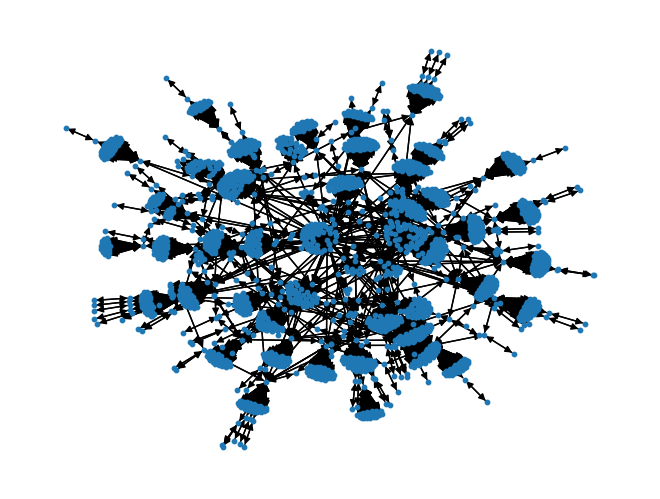

In [33]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
H= create_subgraph(G,1229060372105134080)

nx.draw(H, node_size=10)

In [35]:
H.number_of_nodes()
sorted(H.degree, key=lambda x: x[1], reverse=True)

[(1229060372105134080, 178),
 (1.3249114425590743e+18, 154),
 (1.32486661401421e+18, 124),
 (1.3248664845360128e+18, 116),
 (1.3248658133256806e+18, 116),
 (1.3248663021005087e+18, 114),
 (1.3248661063271834e+18, 114),
 (1.3248660110494351e+18, 110),
 (1.3248651233039196e+18, 110),
 (1.3248650496939827e+18, 110),
 (1.3248653336651407e+18, 108),
 (1.3248595154440806e+18, 106),
 (1.324860835483693e+18, 106),
 (1.3247444448103014e+18, 104),
 (1.324860749563351e+18, 104),
 (1.3248606321733222e+18, 104),
 (1.3248592038617539e+18, 100),
 (1.3248294610035548e+18, 98),
 (1.3247526599963976e+18, 98),
 (1.3248536650147676e+18, 96),
 (1.3248533922593382e+18, 96),
 (1.3248534624091054e+18, 96),
 (1.3248445393712906e+18, 96),
 (1.3248524024160952e+18, 96),
 (1.3248534089484902e+18, 94),
 (1.3248538369897964e+18, 94),
 (1.3248536600362885e+18, 94),
 (1.324844954322129e+18, 94),
 (1.3248449323398144e+18, 94),
 (1.3248452939140178e+18, 92),
 (1.3248454622103224e+18, 90),
 (1.324845344950231e+18, 90),


In [37]:
K = create_subgraph(H,1229060372105134080)
H.number_of_nodes()

2126

In [17]:
largest_subgraph = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (node, val) in largest_subgraph.degree()]

largest_subgraph.number_of_nodes()#/3500 *100

NetworkXNotImplemented: not implemented for directed type

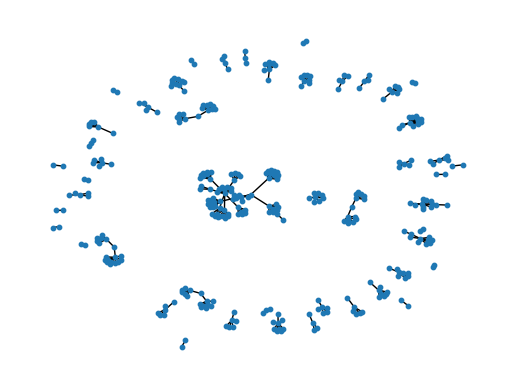

In [40]:
import random
random_sample_edges = random.sample(list(H.edges), 318)
G_sample = nx.Graph()
G_sample.add_edges_from(random_sample_edges)

plt.plot()
nx.draw(G_sample, node_size=10)
plt.show()

In [8]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    nodes = list(G.nodes) #Finds the node list of G
    n = G.number_of_nodes() #Finds the numeber of nodes in G from the node list 
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i] [t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i][j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i][j] * u #Adds to the denominator sum 
            x[i][t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

In [41]:
HK(G_sample,0.1,2000) #With Tau value of 0.1

KeyboardInterrupt: 

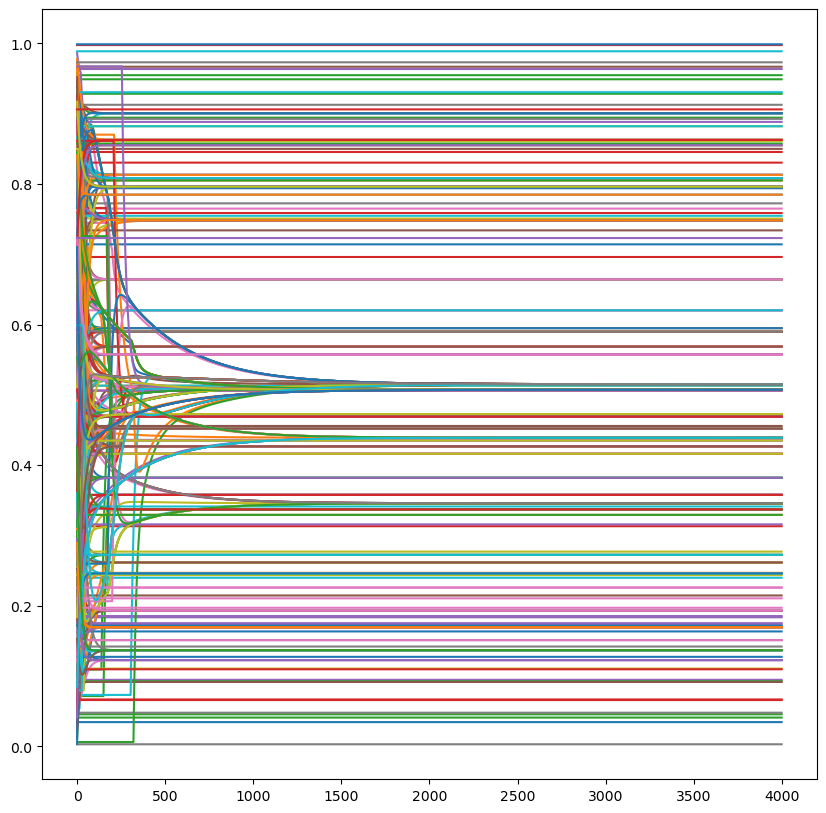

In [45]:
HK(G_sample,0.5,4000) #With Tau value of 0.5


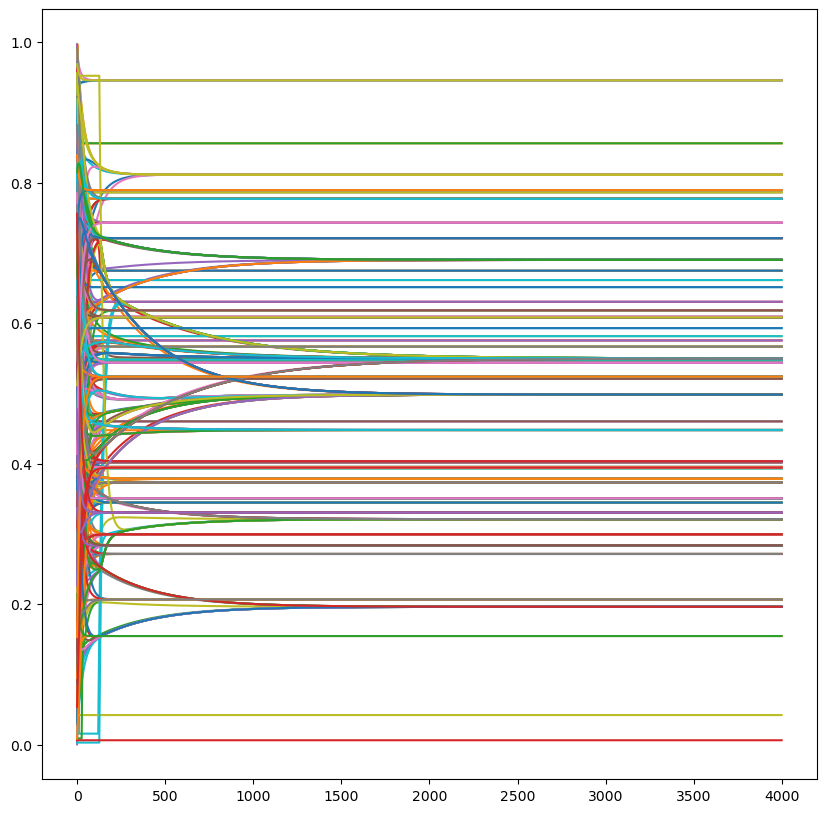

In [46]:
HK(G_sample,0.7,4000) #With Tau value of 0.7

In [61]:
def degroot_model(G, timesteps):
    # initialize the beliefs of each node to 0
    beliefs = [0 for _ in range(G.number_of_nodes())]

    # simulate the convergence of the model over the specified number of timesteps
    for t in range(timesteps):
        # update the beliefs of each node using the DeGroot model
        beliefs = [sum(G.degree(i, weight='weight') * beliefs[i] for i in G[node]) for node in G]

        # normalize the beliefs of each node so that they sum to 1
        beliefs = [b / sum(beliefs) for b in beliefs]

        # visualize the convergence over time
        plt.plot(range(t+1), beliefs)
        plt.xlabel('Timestep')
        plt.ylabel('Belief')

    plt.show()

In [62]:
degroot_model(G, 10)

TypeError: list indices must be integers or slices, not float

In [ ]:
Grapg_Sage()

In [ ]:
import networkx as nx
import torch
import torch.nn as nn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# create an undirected graph with 3 nodes and edges between nodes 0 and 1, and 1 and 2
G = nx.Graph()
G.add_edges_from([(0,1), (1,2)])

# create a GCN model for the graph
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # define the model layers
        self.gcn_layer = nn.Linear(in_features + hidden_features, hidden_features)
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x, adjacency_matrix):
        # apply the GCN layer using the adjacency matrix
        hidden = torch.relu(self.gcn_layer(torch.cat((x, torch.mm(adjacency_matrix, x)), dim=1)))

        # apply the output layer
        output = self.output_layer(hidden)

        return output

gcn = GCN(in_features=1, hidden_features=8, out_features=1)

# create an input tensor for the graph with shape (number of nodes, number of input features)
x = torch.randn(G.number_of_nodes(), 1)

# create an adjacency matrix for the graph with shape (number of nodes, number of nodes)
adjacency_matrix = torch.tensor(nx.to_numpy_matrix(G), dtype=torch.float)

# apply the GCN model to the input tensor and adjacency matrix
output = gcn(x, adjacency_matrix)

# reduce the dimensions of the output using TSNE
tsne = TSNE(n_components=2)
embedding_2d = tsne.fit_transform(tsne)

# plot the 2d embedding of the graph
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])
plt.show()